In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Potato.zip to Potato.zip


In [ ]:
import zipfile
import os

with zipfile.ZipFile("/content/Potato.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")


In [ ]:
import os
print("Files inside dataset/Potato:")
print(os.listdir("dataset/Potato"))

Files inside dataset/Potato:
['Potato___Late_blight', 'Potato___healthy', 'Potato___Early_blight']


In [ ]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/Potato",
    validation_split=0.2,
    subset="training",
    seed=123,
    shuffle=True,
    image_size=(256, 256),
    batch_size=32
)

val_ds_full = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/Potato",
    validation_split=0.2,
    subset="validation",
    seed=123,
    shuffle=False,
    image_size=(256, 256),
    batch_size=32
)

val_batches = list(val_ds_full)
val_len = len(val_batches)

val_ds = val_ds_full.take(len(val_ds_full) // 2)
test_ds = val_ds_full.skip(len(val_ds_full) // 2)



Found 2152 files belonging to 3 classes.
Using 1722 files for training.
Found 2152 files belonging to 3 classes.
Using 430 files for validation.


In [ ]:
len(train_ds), len(val_ds), len(test_ds)

(54, 7, 7)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


In [ ]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(256, 256, 3)),
    data_augmentation,

    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
    # callbacks=[early_stop]
)


Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 256s 5s/step - accuracy: 0.4699 - loss: 0.9468 - val_accuracy: 0.6071 - val_loss: 0.7547
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 263s 5s/step - accuracy: 0.6997 - loss: 0.7087 - val_accuracy: 0.9196 - val_loss: 0.3261
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 250s 5s/step - accuracy: 0.8478 - loss: 0.3742 - val_accuracy: 0.9330 - val_loss: 0.1740
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 261s 5s/step - accuracy: 0.8609 - loss: 0.3554 - val_accuracy: 0.8036 - val_loss: 0.5082
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 254s 5s/step - accuracy: 0.8812 - loss: 0.2921 - val_accuracy: 0.9598 - val_loss: 0.0963
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 253s 5s/step - accuracy: 0.8895 - loss: 0.2795 - val_accuracy: 0.9196 - val_loss: 0.2022
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 255s 5s/step - accuracy: 0.9050 - loss: 0.2288 - val_accuracy: 0.9688 - val_loss: 0.0693
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 247s 5s/step - accuracy: 0.9206 - loss: 0.2068 - val_accuracy: 0.9375 - v

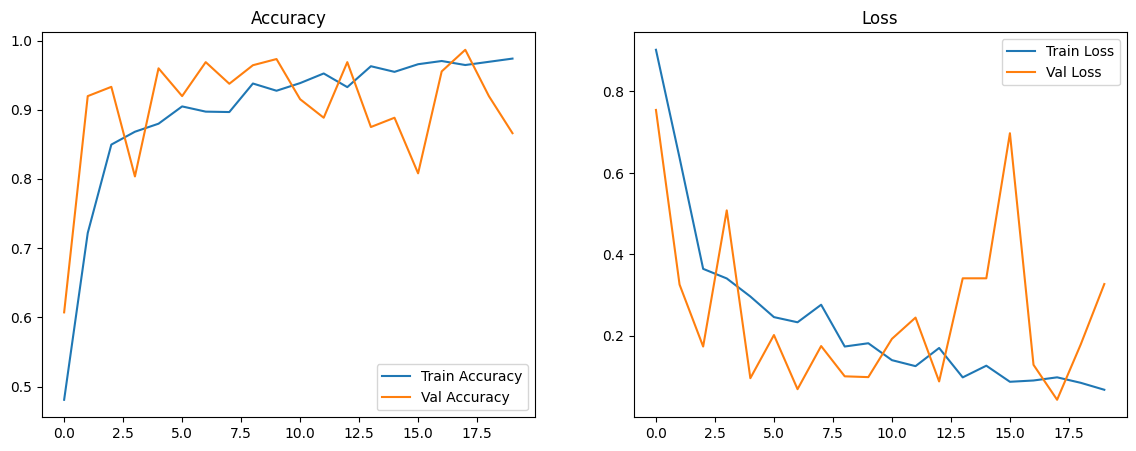

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()


In [ ]:
score = model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9558 - loss: 0.1444
